In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import xgboost as xgb

In [2]:
df = pd.read_csv('LoansTrainingSet - Copy.csv')

C:\Users\phong\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.columns = [x.strip().replace(' ', '_') for x in df.columns]

In [5]:
df.Loan_Status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [6]:
df['Loan_Status'] = df['Loan_Status'].map( {'Charged Off': 0, 'Fully Paid': 1} ).astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan_ID                         256984 non-null object
Customer_ID                     256984 non-null object
Loan_Status                     256984 non-null int32
Current_Loan_Amount             256984 non-null int64
Term                            256984 non-null object
Credit_Score                    195308 non-null float64
Years_in_current_job            256984 non-null object
Home_Ownership                  256984 non-null object
Annual_Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly_Debt                    256984 non-null object
Years_of_Credit_History         256984 non-null float64
Months_since_last_delinquent    116601 non-null float64
Number_of_Open_Accounts         256984 non-null int64
Number_of_Credit_Problems       256984 non-null int64
Current_Credit_Balance          256984 non-null int64
Maximum_Op

In [8]:
len(df.set_index('Loan_ID').index.get_duplicates())

39180

In [9]:
len(df.set_index('Customer_ID').index.get_duplicates())

39180

In [10]:
df.drop_duplicates(['Customer_ID'],keep='first',inplace=True)

In [11]:
len(df.set_index('Customer_ID').index.get_duplicates())

0

In [12]:
df.shape

(215700, 19)

In [13]:
df.describe()

C:\Users\phong\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Loan_Status,Current_Loan_Amount,Credit_Score,Annual_Income,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens
count,215700.000000,2.157000e+05,160692.000000,1.606920e+05,215700.000000,97438.000000,215700.000000,215700.000000,2.157000e+05,215248.000000,215678.000000
mean,0.816834,1.633515e+07,1297.840720,7.331651e+04,18.359758,35.031949,11.077566,0.155424,1.545722e+04,0.110556,0.026331
std,0.386609,3.695307e+07,1826.557335,5.820347e+04,7.057999,21.810714,4.971825,0.457972,1.975031e+04,0.336853,0.240853
min,0.000000,5.050000e+02,585.000000,4.033000e+03,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.000000,8.328750e+03,NaN,NaN,13.600000,NaN,8.000000,0.000000,5.933000e+03,NaN,NaN
50%,1.000000,1.464200e+04,NaN,NaN,17.000000,NaN,10.000000,0.000000,1.104200e+04,NaN,NaN
75%,1.000000,2.520800e+04,NaN,NaN,21.800000,NaN,14.000000,0.000000,1.932400e+04,NaN,NaN
max,1.000000,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [14]:
df.Term.unique()

array(['Short Term', 'Long Term'], dtype=object)

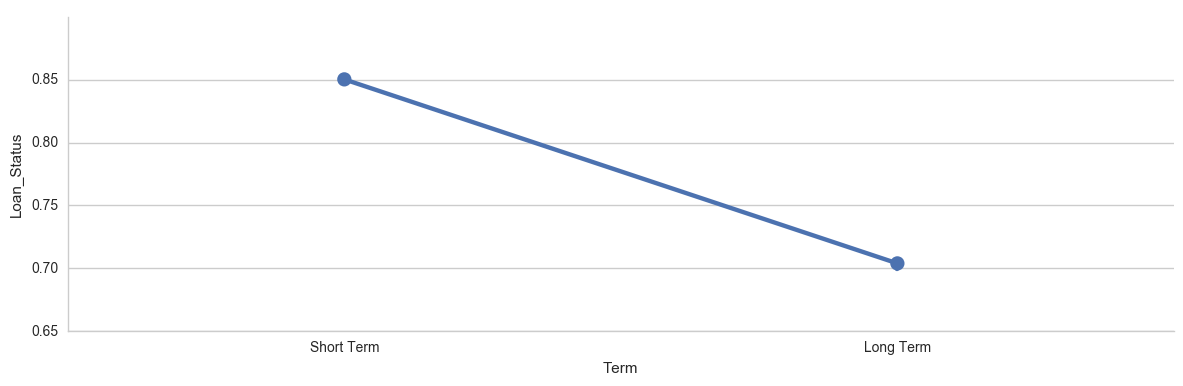

In [15]:
sns.factorplot('Term','Loan_Status', data=df,size=4,aspect=3)

In [16]:
df['Term'] = df['Term'].map( {'Short Term': 0, 'Long Term': 1} ).astype(int)

In [17]:
df.Years_in_current_job .unique()

array(['10+ years', '4 years', '6 years', '5 years', 'n/a', '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'], dtype=object)

In [18]:
df['Years_in_current_job'] = df['Years_in_current_job'].map( {'10+ years':11, '4 years':4, '6 years':6, '5 years':5, 'n/a':np.nan, 
                                                              '3 years':3,'2 years':2, '< 1 year':0, '1 year':1, '7 years':7, 
                                                              '9 years':9, '8 years':8} )

In [19]:
df.Home_Ownership.unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [20]:
df['Home_Ownership'] = df['Home_Ownership'].str.replace('Home Mortgage','HaveMortgage')

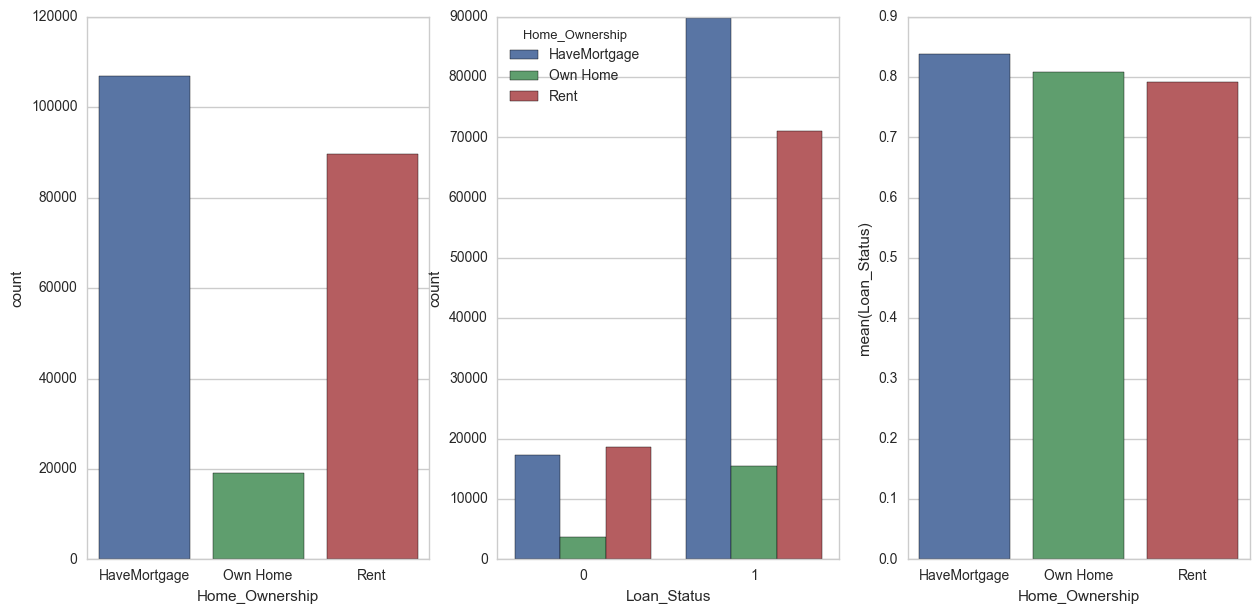

In [21]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,7))
sns.countplot(x='Home_Ownership', data=df, ax=axis1)
sns.countplot(x='Loan_Status', hue="Home_Ownership", data=df, order=[0,1], ax=axis2)
mean_ownership = df[["Home_Ownership", "Loan_Status"]].groupby(['Home_Ownership'],as_index=False).mean()
sns.barplot(x='Home_Ownership', y='Loan_Status', data=mean_ownership,order=['HaveMortgage','Own Home','Rent'],ax=axis3)

In [22]:
# other and Other are different, fix them 
df.Purpose.unique()

array(['Debt Consolidation', 'other', 'Business Loan', 'Home Improvements',
       'Buy House', 'Other', 'Buy a Car', 'Medical Bills', 'Take a Trip',
       'Educational Expenses'], dtype=object)

In [23]:
df['Purpose'] = df['Purpose'].str.replace('other','Other')

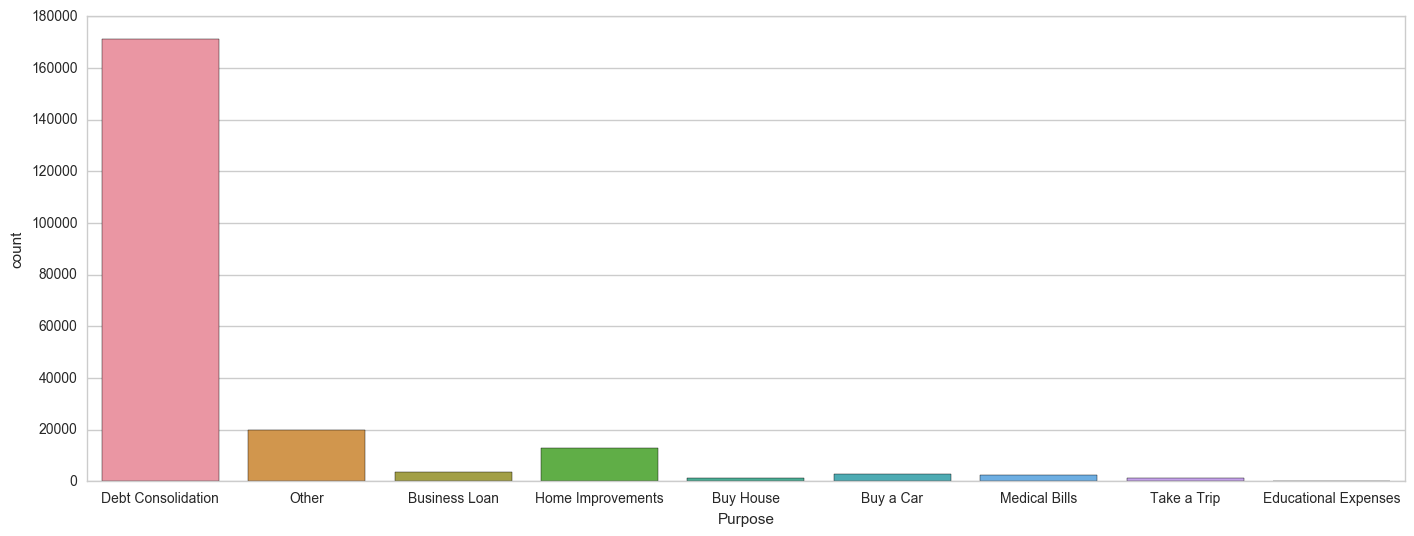

In [24]:
fig, (axis1) = plt.subplots(1,1,figsize=(17,6))
sns.countplot(x='Purpose', data=df,ax=axis1)

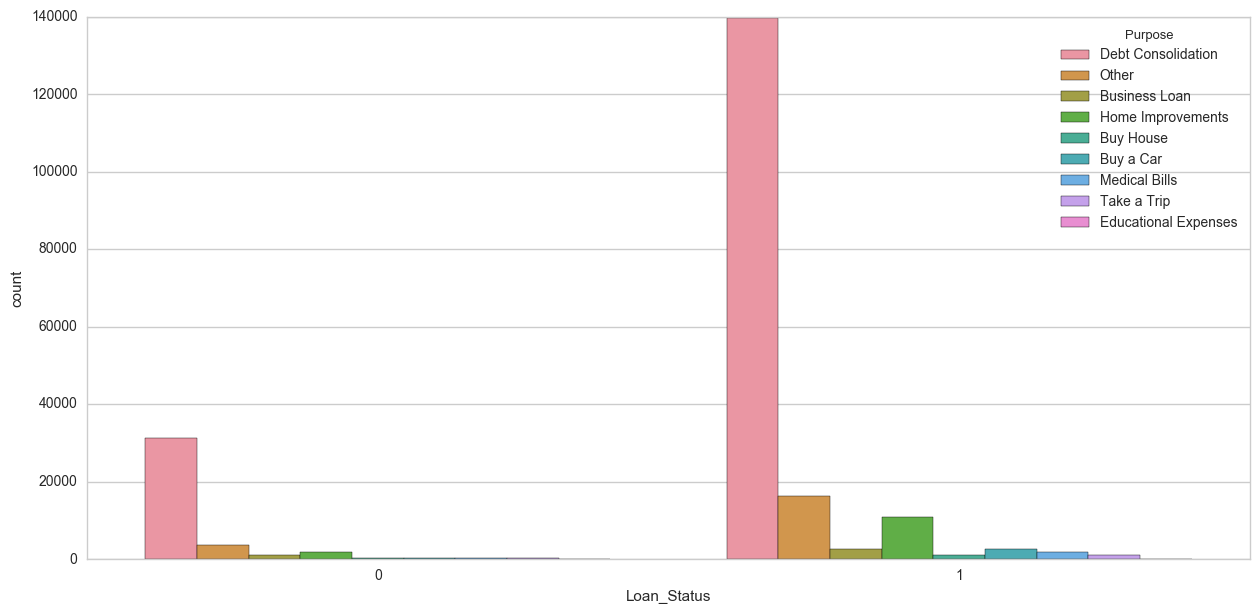

In [25]:
fig,(axis1) = plt.subplots(1,1,figsize=(15,7))
sns.countplot(x='Loan_Status', hue="Purpose", data=df, order=[0,1], ax=axis1)

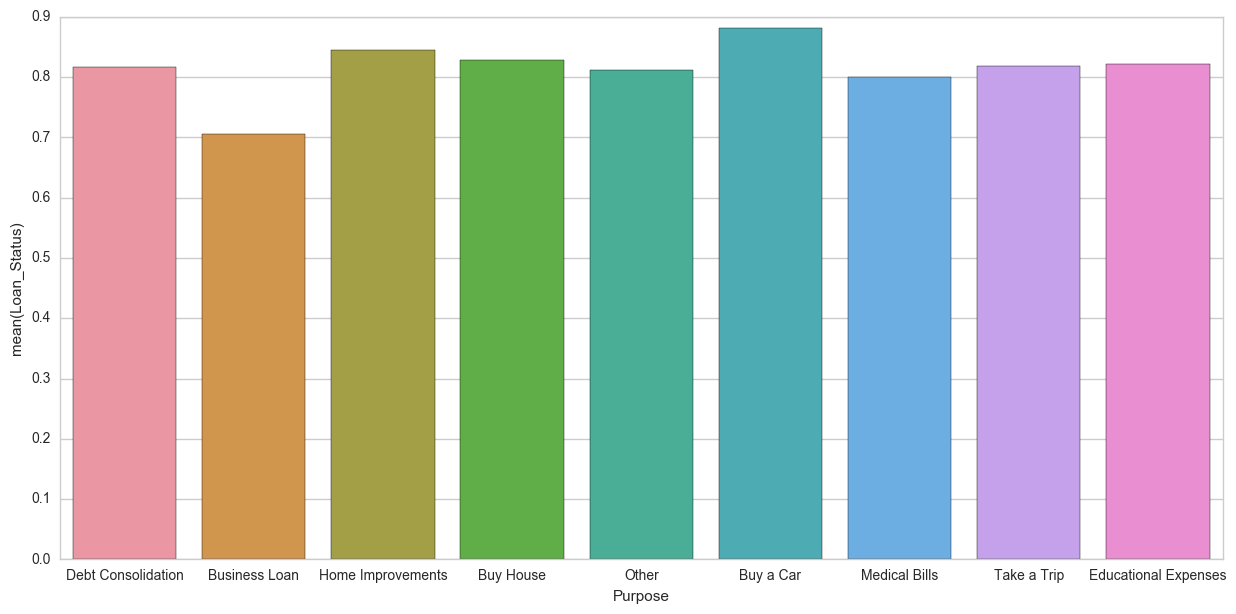

In [26]:
fig,(axis1) = plt.subplots(1,1,figsize=(15,7))
mean_purpose = df[["Purpose", "Loan_Status"]].groupby(['Purpose'],as_index=False).mean()
sns.barplot(x='Purpose', y='Loan_Status', data=mean_purpose,order=['Debt Consolidation', 
         'Business Loan', 'Home Improvements','Buy House', 'Other', 'Buy a Car', 
        'Medical Bills', 'Take a Trip',
       'Educational Expenses'],ax=axis1)

In [27]:
df['Monthly_Debt'] = df['Monthly_Debt'].map(lambda x: x.lstrip('$').replace(',','')).astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215700 entries, 0 to 256983
Data columns (total 19 columns):
Loan_ID                         215700 non-null object
Customer_ID                     215700 non-null object
Loan_Status                     215700 non-null int32
Current_Loan_Amount             215700 non-null int64
Term                            215700 non-null int32
Credit_Score                    160692 non-null float64
Years_in_current_job            206710 non-null float64
Home_Ownership                  215700 non-null object
Annual_Income                   160692 non-null float64
Purpose                         215700 non-null object
Monthly_Debt                    215700 non-null float64
Years_of_Credit_History         215700 non-null float64
Months_since_last_delinquent    97438 non-null float64
Number_of_Open_Accounts         215700 non-null int64
Number_of_Credit_Problems       215700 non-null int64
Current_Credit_Balance          215700 non-null int64
Maximum_Op

In [29]:
df.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,0,741.0,11.0,HaveMortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,0,734.0,4.0,HaveMortgage,42269.0,Other,1106.04,26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,0,747.0,11.0,HaveMortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,0,747.0,11.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,0,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [30]:
df.describe()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Tax_Liens
count,215700.000000,2.157000e+05,215700.000000,160692.000000,206710.000000,1.606920e+05,215700.000000,215700.000000,97438.000000,215700.000000,215700.000000,2.157000e+05,215248.000000,215678.000000
mean,0.816834,1.633515e+07,0.227988,1297.840720,6.197257,7.331651e+04,960.396602,18.359758,35.031949,11.077566,0.155424,1.545722e+04,0.110556,0.026331
std,0.386609,3.695307e+07,0.419635,1826.557335,4.004819,5.820347e+04,634.782724,7.057999,21.810714,4.971825,0.457972,1.975031e+04,0.336853,0.240853
min,0.000000,5.050000e+02,0.000000,585.000000,0.000000,4.033000e+03,0.000000,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.000000,8.328750e+03,0.000000,NaN,NaN,NaN,527.647500,13.600000,NaN,8.000000,0.000000,5.933000e+03,NaN,NaN
50%,1.000000,1.464200e+04,0.000000,NaN,NaN,NaN,840.550000,17.000000,NaN,10.000000,0.000000,1.104200e+04,NaN,NaN
75%,1.000000,2.520800e+04,0.000000,NaN,NaN,NaN,1249.962500,21.800000,NaN,14.000000,0.000000,1.932400e+04,NaN,NaN
max,1.000000,1.000000e+08,1.000000,7510.000000,11.000000,8.713547e+06,22939.120000,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [31]:
df=df.dropna(subset=['Bankruptcies'])

In [32]:
df[['Credit_Score','Years_in_current_job','Annual_Income','Months_since_last_delinquent','Bankruptcies','Tax_Liens']].isnull().sum()

Credit_Score                     54903
Years_in_current_job              8990
Annual_Income                    54903
Months_since_last_delinquent    118259
Bankruptcies                         0
Tax_Liens                            0
dtype: int64

In [33]:
#df.dropna(subset = ['column1_name', 'column2_name', 'column3_name'])

In [34]:
df.loc[df['Credit_Score']>800,'Credit_Score']/=10

C:\Users\phong\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
df.Credit_Score.head(20)

0     741.0
1     734.0
2     747.0
3     747.0
4     746.0
5     716.0
6     664.0
8       NaN
9     733.0
10    742.0
11    742.0
12      NaN
16    744.0
17    744.0
18    729.0
20      NaN
22      NaN
23    745.0
24    734.0
25    733.0
Name: Credit_Score, dtype: float64

In [36]:
df[['Number_of_Open_Accounts','Number_of_Credit_Problems','Bankruptcies','Tax_Liens']][df['Number_of_Credit_Problems']>1].head()

,Number_of_Open_Accounts,Number_of_Credit_Problems,Bankruptcies,Tax_Liens
77,11,2,2.0,0.0
165,8,5,0.0,5.0
218,11,2,1.0,1.0
396,17,2,1.0,0.0
481,11,3,0.0,2.0


In [37]:
#df[['Maximum_Open_Credit']].applymap(lambda x: str.count(x, '#VALUE!'))
df['Maximum_Open_Credit']=df['Maximum_Open_Credit'].convert_objects(convert_numeric=True)

C:\Users\phong\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
C:\Users\phong\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [38]:
df['Maximum_Open_Credit'].isnull().sum()

2

In [39]:
df=df.dropna(subset=['Maximum_Open_Credit'])

In [40]:
#credit utilization from Current Credit Balance divide Maximum_Open_Credit
df['Credit_Utilization']=df['Maximum_Open_Credit']/df['Number_of_Open_Accounts']
#df=df.drop(['Maximum_Open_Credit','Number_of_Open_Accounts'],axis=1)

In [41]:
df.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Credit_Utilization
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,0,741.0,11.0,HaveMortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056.0,0.0,0.0,1605.600000
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,0,734.0,4.0,HaveMortgage,42269.0,Other,1106.04,26.3,NaN,17,0,6262,19149.0,0.0,0.0,1126.411765
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,0,747.0,11.0,HaveMortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335.0,0.0,0.0,5667.000000
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,0,747.0,11.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915.0,0.0,0.0,4879.444444
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,0,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081.0,0.0,0.0,3090.083333


In [42]:
df.Years_in_current_job.unique()

array([ 11.,   4.,   6.,   5.,  nan,   3.,   2.,   0.,   1.,   7.,   9.,
         8.])

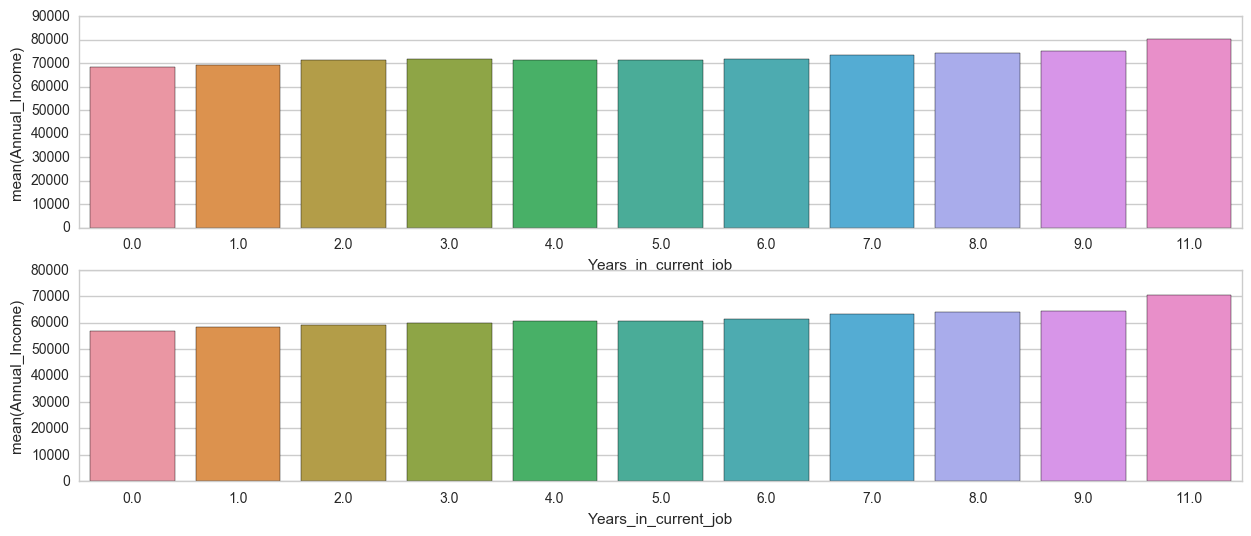

In [43]:
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,6))
mean_income_vs_year = df[["Years_in_current_job", "Annual_Income"]].groupby(['Years_in_current_job'],as_index=False).mean()
sns.barplot(x='Years_in_current_job', y='Annual_Income', data=mean_income_vs_year,ax=axis1)
median_income_vs_year=df[["Years_in_current_job", "Annual_Income"]].groupby(['Years_in_current_job'],as_index=False).median()
sns.barplot(x='Years_in_current_job', y='Annual_Income', data=median_income_vs_year,ax=axis2)

In [44]:
#dup_index=df.set_index('Customer_ID').index.get_duplicates()

In [45]:
#duplicates=df.loc[df['Customer_ID'].isin(dup_index)]

In [46]:
nan_years=df[df['Years_in_current_job'].isnull()]

In [47]:
nan_years['Annual_Income'][nan_years.Annual_Income.notnull()].mean()

48339.96171036949

In [48]:
nan_years['Annual_Income'].mean(),nan_years['Annual_Income'].median(),nan_years['Annual_Income'].min(),nan_years['Annual_Income'].max()

(48339.96171036949, 43039.5, 4134.0, 769044.0)

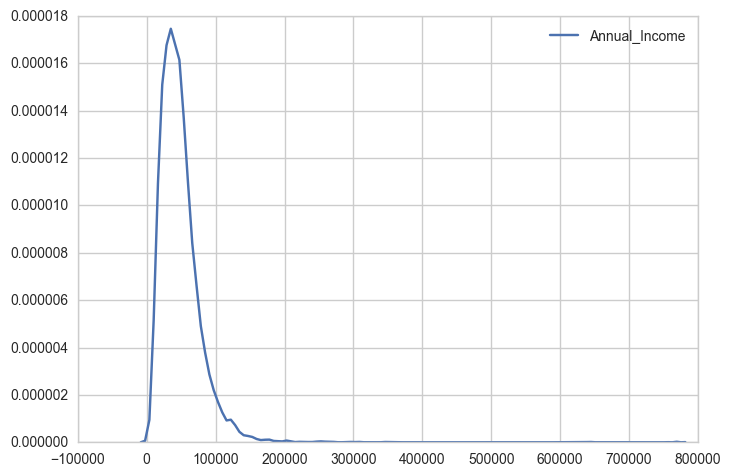

In [49]:
#facet = sns.FacetGrid(nan_years, hue="Years_in_current_job",aspect=4)
#facet.map(sns.kdeplot,'Annual_Income',shade= True)
#facet.set(xlim=(0, titanic_df['Age'].max()))
#facet.add_legend()
sns.kdeplot(nan_years.Annual_Income)

In [50]:
df[['Credit_Score','Years_in_current_job','Annual_Income','Months_since_last_delinquent','Bankruptcies','Tax_Liens']].isnull().sum()

Credit_Score                     54902
Years_in_current_job              8990
Annual_Income                    54902
Months_since_last_delinquent    118258
Bankruptcies                         0
Tax_Liens                            0
dtype: int64

In [51]:
mean_income_vs_year, median_income_vs_year

(    Years_in_current_job  Annual_Income
 0                    0.0   68545.013340
 1                    1.0   69093.283486
 2                    2.0   71237.986845
 3                    3.0   71761.327448
 4                    4.0   71548.641534
 5                    5.0   71544.200862
 6                    6.0   71740.567138
 7                    7.0   73405.341305
 8                    8.0   74349.727641
 9                    9.0   75312.077964
 10                  11.0   80497.724589,
     Years_in_current_job  Annual_Income
 0                    0.0        57087.0
 1                    1.0        58239.5
 2                    2.0        59293.0
 3                    3.0        59759.5
 4                    4.0        60786.0
 5                    5.0        60822.0
 6                    6.0        61267.0
 7                    7.0        63229.5
 8                    8.0        64044.5
 9                    9.0        64552.0
 10                  11.0        70357.0)

In [52]:
def process_years():
    
    global df
    
    # a function that fills the missing values of the Years_in_current_job variable
    
    def fillyears(row):
        if row['Annual_Income']<=57004:
            return 0
        elif  57004<row['Annual_Income']<= 58168:
            return 1
        elif 58168<row['Annual_Income']<= 59292:
            return 2
        elif  59292<row['Annual_Income']<= 59761:
            return 3
        elif 59761<row['Annual_Income']<= 60779:
            return 4
        elif 60779<['Annual_Income']<= 60816:
            return 5
        elif 60816<row['Annual_Income']<= 61244:
            return 6
        elif 61244<row['Annual_Income']<= 63219:
            return 7
        elif 63219<row['Annual_Income']<= 64038:
            return 8
        elif 64038<row['Annual_Income']<= 64552:
            return 9
        elif 64552<row['Annual_Income']<= 70357:
            return 10
        else: return 11
    df.Years_in_current_job = df.apply(lambda r : fillyears(r) if np.isnan(r['Years_in_current_job']) else r['Years_in_current_job'], axis=1)

In [53]:
process_years()

In [54]:
df[['Credit_Score','Years_in_current_job','Annual_Income','Months_since_last_delinquent','Bankruptcies','Tax_Liens']].isnull().sum()

Credit_Score                     54902
Years_in_current_job                 0
Annual_Income                    54902
Months_since_last_delinquent    118258
Bankruptcies                         0
Tax_Liens                            0
dtype: int64

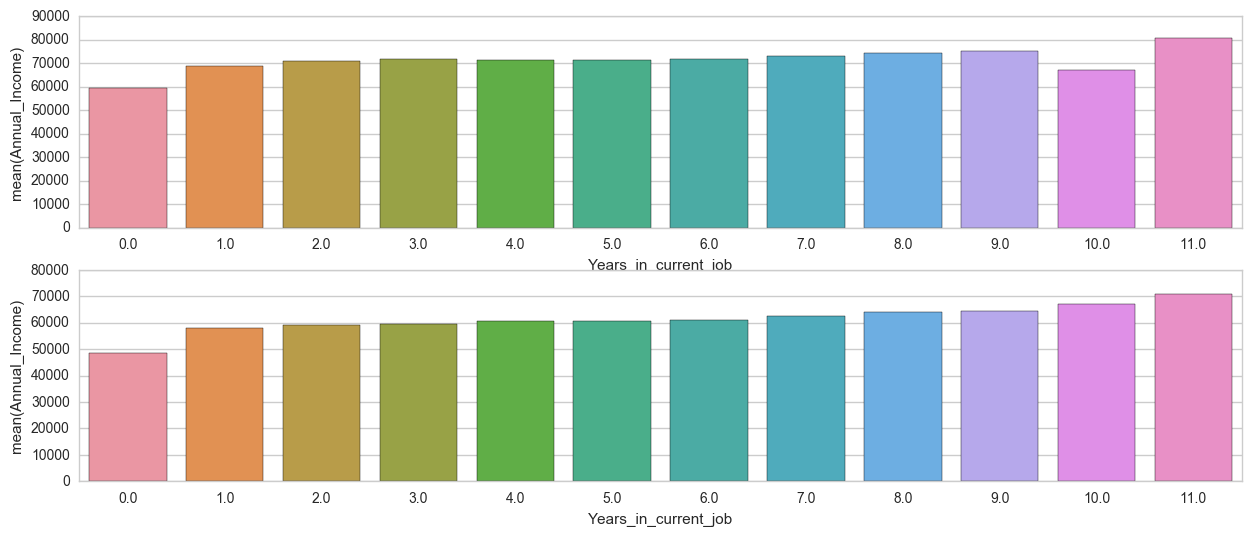

In [55]:
fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,6))
mean_income_vs_year = df[["Years_in_current_job", "Annual_Income"]].groupby(['Years_in_current_job'],as_index=False).mean()
sns.barplot(x='Years_in_current_job', y='Annual_Income', data=mean_income_vs_year,ax=axis1)
median_income_vs_year=df[["Years_in_current_job", "Annual_Income"]].groupby(['Years_in_current_job'],as_index=False).median()
sns.barplot(x='Years_in_current_job', y='Annual_Income', data=median_income_vs_year,ax=axis2)

In [56]:
mean_income_vs_year, median_income_vs_year

(    Years_in_current_job  Annual_Income
 0                    0.0   59353.692151
 1                    1.0   69038.818216
 2                    2.0   71146.683051
 3                    3.0   71721.870812
 4                    4.0   71446.370904
 5                    5.0   71544.200862
 6                    6.0   71699.439666
 7                    7.0   73287.326976
 8                    8.0   74273.218227
 9                    9.0   75242.555754
 10                  10.0   67339.914754
 11                  11.0   80848.479841,
     Years_in_current_job  Annual_Income
 0                    0.0        48566.0
 1                    1.0        58012.0
 2                    2.0        59124.0
 3                    3.0        59694.0
 4                    4.0        60624.0
 5                    5.0        60822.0
 6                    6.0        61207.0
 7                    7.0        62720.0
 8                    8.0        63908.0
 9                    9.0        64461.0
 10            

In [57]:
ridge=df[['Years_in_current_job','Annual_Income','Home_Ownership']]
Ownership_dummies=pd.get_dummies(ridge.Home_Ownership,prefix="Ownership", drop_first=True)
ridge=pd.merge(ridge,Ownership_dummies,left_index=True, right_index=True)
ridge.drop('Home_Ownership',axis=1,inplace=True)

In [58]:
ridge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215246 entries, 0 to 256983
Data columns (total 4 columns):
Years_in_current_job    215246 non-null float64
Annual_Income           160344 non-null float64
Ownership_Own Home      215246 non-null float64
Ownership_Rent          215246 non-null float64
dtypes: float64(4)
memory usage: 8.2 MB


In [59]:
ridge_train=ridge[ridge.Annual_Income.notnull()]

In [60]:
ridge_train.head()

,Years_in_current_job,Annual_Income,Ownership_Own Home,Ownership_Rent
0,11.0,33694.0,0.0,0.0
1,4.0,42269.0,0.0,0.0
2,11.0,90126.0,0.0,0.0
3,11.0,38072.0,1.0,0.0
4,4.0,50025.0,0.0,1.0


In [61]:
ridge_train.shape

(160344, 4)

In [62]:
ridge_test=ridge[ridge.Annual_Income.isnull()]

In [63]:
ridge_test.head()

,Years_in_current_job,Annual_Income,Ownership_Own Home,Ownership_Rent
8,5.0,NaN,0.0,1.0
12,0.0,NaN,1.0,0.0
20,3.0,NaN,0.0,0.0
22,3.0,NaN,0.0,0.0
26,11.0,NaN,0.0,1.0


In [64]:
ridge_test.shape

(54902, 4)

In [65]:
from sklearn.linear_model import Ridge

In [66]:
# for tinanic, can classify the mean and median for the gender based on MR,MRS, MS
#Cabin variable, for missing values, make unknown values
#For sibling and parents, make a new column called family
#divide credit score to 10 when they have problems
#

In [67]:
X_ridge_train=ridge_train[['Years_in_current_job','Ownership_Own Home','Ownership_Rent']]
y__ridge_train=ridge_train[['Annual_Income']]

In [68]:
ridgereg = Ridge(alpha=1,normalize=True)
ridgereg.fit(X_ridge_train,y__ridge_train)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [69]:
ridge_predict_income= ridgereg.predict(ridge_test[['Years_in_current_job','Ownership_Own Home','Ownership_Rent']])

In [70]:
ridge_predict_income=ridge_predict_income.ravel()

In [71]:
ridge_predict_income=pd.Series(ridge_predict_income)

In [72]:
df.loc[df['Annual_Income'].isnull(), 'Annual_Income'] = ridge_predict_income.reindex(np.arange(df['Annual_Income'].isnull().sum())).values

In [73]:
df['Annual_Income'].isnull().sum()

0

In [74]:
df[['Credit_Score','Years_in_current_job','Annual_Income','Months_since_last_delinquent','Bankruptcies','Tax_Liens']].isnull().sum()

Credit_Score                     54902
Years_in_current_job                 0
Annual_Income                        0
Months_since_last_delinquent    118258
Bankruptcies                         0
Tax_Liens                            0
dtype: int64

In [75]:
df.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Credit_Utilization
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,0,741.0,11.0,HaveMortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056.0,0.0,0.0,1605.600000
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,0,734.0,4.0,HaveMortgage,42269.0,Other,1106.04,26.3,NaN,17,0,6262,19149.0,0.0,0.0,1126.411765
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,0,747.0,11.0,HaveMortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335.0,0.0,0.0,5667.000000
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,0,747.0,11.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915.0,0.0,0.0,4879.444444
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,0,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081.0,0.0,0.0,3090.083333


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215246 entries, 0 to 256983
Data columns (total 20 columns):
Loan_ID                         215246 non-null object
Customer_ID                     215246 non-null object
Loan_Status                     215246 non-null int32
Current_Loan_Amount             215246 non-null int64
Term                            215246 non-null int32
Credit_Score                    160344 non-null float64
Years_in_current_job            215246 non-null float64
Home_Ownership                  215246 non-null object
Annual_Income                   215246 non-null float64
Purpose                         215246 non-null object
Monthly_Debt                    215246 non-null float64
Years_of_Credit_History         215246 non-null float64
Months_since_last_delinquent    96988 non-null float64
Number_of_Open_Accounts         215246 non-null int64
Number_of_Credit_Problems       215246 non-null int64
Current_Credit_Balance          215246 non-null int64
Maximum_Op

In [77]:
#dummies=pd.get_dummies(df,columns=[''],drop_first=True)
#df_train=pd.merge(df_train,Pclass_dummies_train,left_index=True, right_index=True)

In [78]:
df=df.dropna(subset=['Credit_Utilization'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215243 entries, 0 to 256983
Data columns (total 20 columns):
Loan_ID                         215243 non-null object
Customer_ID                     215243 non-null object
Loan_Status                     215243 non-null int32
Current_Loan_Amount             215243 non-null int64
Term                            215243 non-null int32
Credit_Score                    160343 non-null float64
Years_in_current_job            215243 non-null float64
Home_Ownership                  215243 non-null object
Annual_Income                   215243 non-null float64
Purpose                         215243 non-null object
Monthly_Debt                    215243 non-null float64
Years_of_Credit_History         215243 non-null float64
Months_since_last_delinquent    96986 non-null float64
Number_of_Open_Accounts         215243 non-null int64
Number_of_Credit_Problems       215243 non-null int64
Current_Credit_Balance          215243 non-null int64
Maximum_Op

In [80]:
ridge_credit=df[['Credit_Score','Years_of_Credit_History','Number_of_Open_Accounts','Number_of_Credit_Problems',
                'Bankruptcies','Tax_Liens','Credit_Utilization']]

In [81]:
ridge_credit_train=ridge_credit[ridge_credit.Credit_Score.notnull()]

In [82]:
ridge_credit_test=ridge_credit[ridge_credit.Credit_Score.isnull()]

In [83]:
X_ridge_credit_train=ridge_credit_train.ix[:,1:]
y_ridge_credit_train=ridge_credit_train.ix[:,0]

In [84]:
ridgereg.fit(X_ridge_credit_train,y_ridge_credit_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [85]:
ridge_predict_credit=ridgereg.predict(ridge_credit_test.ix[:,1:])

In [86]:
ridge_predict_credit=ridge_predict_credit.ravel()

In [87]:
ridge_predict_credit=pd.Series(ridge_predict_credit)

In [88]:
df.loc[df['Credit_Score'].isnull(), 'Credit_Score'] = ridge_predict_credit.reindex(np.arange(df['Credit_Score'].isnull().sum())).values

In [89]:
df[['Credit_Score']].isnull().sum()

Credit_Score    0
dtype: int64

In [90]:
df_new=df.drop(['Loan_ID','Customer_ID','Months_since_last_delinquent'],axis=1)

In [91]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215243 entries, 0 to 256983
Data columns (total 17 columns):
Loan_Status                  215243 non-null int32
Current_Loan_Amount          215243 non-null int64
Term                         215243 non-null int32
Credit_Score                 215243 non-null float64
Years_in_current_job         215243 non-null float64
Home_Ownership               215243 non-null object
Annual_Income                215243 non-null float64
Purpose                      215243 non-null object
Monthly_Debt                 215243 non-null float64
Years_of_Credit_History      215243 non-null float64
Number_of_Open_Accounts      215243 non-null int64
Number_of_Credit_Problems    215243 non-null int64
Current_Credit_Balance       215243 non-null int64
Maximum_Open_Credit          215243 non-null float64
Bankruptcies                 215243 non-null float64
Tax_Liens                    215243 non-null float64
Credit_Utilization           215243 non-null float64
dt

In [92]:
dummies1=pd.get_dummies(df_new['Home_Ownership'],prefix='Ownership',drop_first=True)
df_new=pd.merge(df_new,dummies1,left_index=True, right_index=True)
dummies2=pd.get_dummies(df_new['Purpose'],prefix='Purpose',drop_first=True)
df_new=pd.merge(df_new,dummies2,left_index=True, right_index=True)

In [93]:
df_new=df_new.drop(['Home_Ownership','Purpose'],axis=1)

In [94]:
df_new.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,...,Ownership_Own Home,Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip
0,1,11520,0,741.0,11.0,33694.0,584.03,12.3,10,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,3441,0,734.0,4.0,42269.0,1106.04,26.3,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,21029,0,747.0,11.0,90126.0,1321.85,28.8,5,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,18743,0,747.0,11.0,38072.0,751.92,26.2,9,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,11731,0,746.0,4.0,50025.0,355.18,11.5,12,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [95]:
features = list(df_new.columns[1:])
y = df_new['Loan_Status']
X = df_new[features]


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
from sklearn.cross_validation import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [98]:
clf_rdf = RandomForestClassifier()
clf_rdf=clf_rdf.fit(X_train,y_train)
clf_rdf.score(X_test,y_test)

0.7887823626304008

In [99]:
clf_gb=GradientBoostingClassifier()
clf_gb=clf_gb.fit(X_train,y_train)
#gb=clf_gb.predict(X_test)
clf_gb.score(X_test,y_test)

0.81660120229195698

In [100]:
#remove 9999 value in current_loan_amount
#Fix the credit ultilization

In [102]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
xgb_predict=xgb.predict(X_test)
xgb.score(X_test,y_test)

0.81657304557165178